<a href="https://colab.research.google.com/github/Elimeleth/aprende_ml/blob/main/MLEP01_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [4]:
df = pd.read_csv("iris.csv")

In [13]:
df.rename(columns={"Id": "_id", "SepalLengthCm": "sl", "SepalWidthCm": "sw", "PetalLengthCm": "pl", "PetalWidthCm": "pw", "Species": "species"}, inplace=True)

In [14]:
df.head()

,_id,sl,sw,pl,pw,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
X = df.drop(columns=["species"])
y = df["species"]

In [17]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
X_scaled_train = StandardScaler().fit_transform(X_train)
X_scaled_test = StandardScaler().fit_transform(X_test)

In [20]:
X_scaled_test

array([[-0.0556222 ,  0.14443512, -0.63451517,  0.45110832, -0.07943674],
       [-1.31283631, -0.33701527,  2.00929805, -1.2060243 , -1.20827465],
       [ 0.97300752,  2.07023667, -1.16327782,  1.66633891,  1.30025404],
       [ 0.05866999,  0.02407252, -0.37013385,  0.34063282,  0.29684256],
       [ 0.01295312,  0.98697329, -0.63451517,  0.50634608,  0.17141613],
       [-1.01567661, -0.69810306,  0.95177276, -1.3164998 , -1.08284822],
       [-0.26134814, -0.45737787, -0.37013385, -0.15650697,  0.04598969],
       [ 1.49875161,  1.10733589,  0.15862879,  0.67205934,  1.30025404],
       [-0.16991439,  0.26479771, -2.22080311,  0.34063282,  0.29684256],
       [ 0.15010374, -0.21665267, -0.8988965 ,  0.00920629, -0.07943674],
       [ 0.79014002,  0.6258855 ,  0.42301012,  0.67205934,  0.92397473],
       [-1.44998694, -1.42027864, -0.10575253, -1.37173756, -1.45912752],
       [-0.90138442, -0.57774046,  1.21615408, -1.42697531, -1.33370109],
       [-1.51856225, -1.29991605,  0.1

In [28]:
log_reg = LogisticRegression()
param_grip_log_reg = {
    "penalty": ["l2", "none"],
    "C": np.logspace(-4, 4, 20)
}
grip_search_log_reg = RandomizedSearchCV(log_reg, param_grip_log_reg, cv=5, n_jobs=-1)
grip_search_log_reg.fit(X_scaled_train, y_train)
best_model_log_reg = grip_search_log_reg.best_estimator_
best_model_log_reg

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


LogisticRegression(C=0.615848211066026, penalty='none')

In [23]:
np.logspace(-4,4,10)

array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04])

In [27]:
rf = RandomForestClassifier()
param_grip_rf = {
    "n_estimators": [100,200,300],
    "max_depth": [None, 5, 10, 20]
}
grip_search_rf = RandomizedSearchCV(rf, param_grip_rf, cv=5, n_jobs=-1)
grip_search_rf.fit(X_scaled_train, y_train)
best_model_rf = grip_search_rf.best_estimator_
best_model_rf

RandomForestClassifier(max_depth=5, n_estimators=200)

In [29]:
y_pred_log_reg = best_model_log_reg.predict(X_scaled_test)
y_pred_rf = best_model_rf.predict(X_scaled_test)

In [31]:
acc_log_reg = accuracy_score(y_test, y_pred_log_reg)
acc_rf = accuracy_score(y_test, y_pred_rf)


print(f"Accuracy of Logistic Regression: {acc_log_reg:.4f}")
print(f"Accuracy of Random Forest: {acc_rf:.4f}")

Accuracy of Logistic Regression: 1.0000
Accuracy of Random Forest: 1.0000


In [32]:
from sklearn.cluster import KMeans

In [34]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(X_scaled_train)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

In [35]:
import matplotlib.pyplot as plt

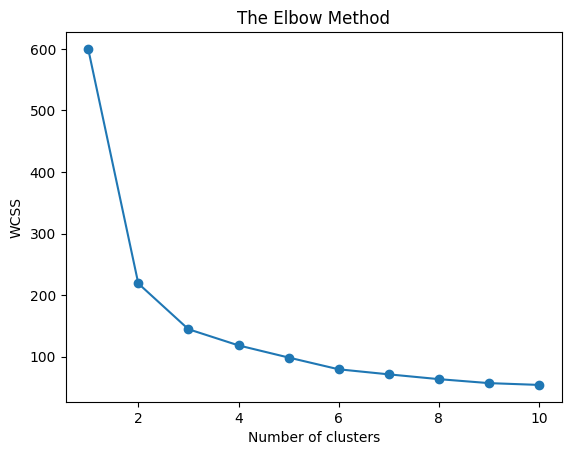

In [37]:
plt.plot(range(1, 11), wcss, marker='o')
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [40]:
kmeans = KMeans(n_clusters=3, init="k-means++", max_iter=300, n_init=10, random_state=0)
kmeans.fit(X_scaled_train)


KMeans(n_clusters=3, n_init=10, random_state=0)

In [41]:
cluster_labels = kmeans.labels_

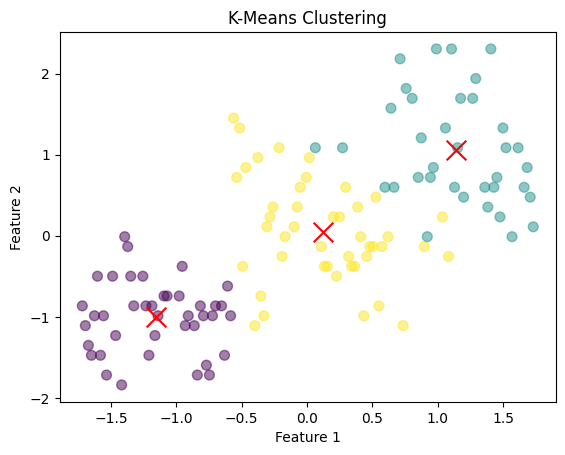

In [44]:
plt.scatter(X_scaled_train[:, 0], X_scaled_train[:, 1], c=cluster_labels, cmap="viridis", s=50, alpha=.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c="red", marker="x", s=200, label="centroid")
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

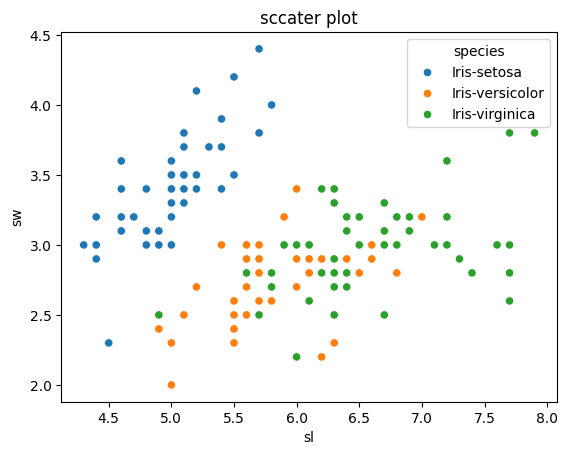

In [46]:
import seaborn as sns

x_var = "sl"

sns.scatterplot(x=x_var, y="sw", hue="species", data=df, marker="o")

plt.title("sccater plot")
plt.xlabel(x_var)
plt.ylabel("sw")
plt.show()

In [47]:
list(zip(cluster_labels, df["species"].values))

[(0, 'Iris-setosa'),
 (0, 'Iris-setosa'),
 (2, 'Iris-setosa'),
 (0, 'Iris-setosa'),
 (0, 'Iris-setosa'),
 (1, 'Iris-setosa'),
 (2, 'Iris-setosa'),
 (0, 'Iris-setosa'),
 (0, 'Iris-setosa'),
 (0, 'Iris-setosa'),
 (1, 'Iris-setosa'),
 (2, 'Iris-setosa'),
 (1, 'Iris-setosa'),
 (0, 'Iris-setosa'),
 (0, 'Iris-setosa'),
 (2, 'Iris-setosa'),
 (1, 'Iris-setosa'),
 (1, 'Iris-setosa'),
 (2, 'Iris-setosa'),
 (1, 'Iris-setosa'),
 (2, 'Iris-setosa'),
 (1, 'Iris-setosa'),
 (2, 'Iris-setosa'),
 (0, 'Iris-setosa'),
 (1, 'Iris-setosa'),
 (2, 'Iris-setosa'),
 (0, 'Iris-setosa'),
 (0, 'Iris-setosa'),
 (0, 'Iris-setosa'),
 (2, 'Iris-setosa'),
 (1, 'Iris-setosa'),
 (0, 'Iris-setosa'),
 (0, 'Iris-setosa'),
 (0, 'Iris-setosa'),
 (2, 'Iris-setosa'),
 (0, 'Iris-setosa'),
 (2, 'Iris-setosa'),
 (1, 'Iris-setosa'),
 (0, 'Iris-setosa'),
 (2, 'Iris-setosa'),
 (2, 'Iris-setosa'),
 (0, 'Iris-setosa'),
 (1, 'Iris-setosa'),
 (2, 'Iris-setosa'),
 (2, 'Iris-setosa'),
 (2, 'Iris-setosa'),
 (1, 'Iris-setosa'),
 (2, 'Iris-se

In [49]:
y_pred_k = kmeans.predict(X_scaled_test)
acc_k = accuracy_score(y_test, y_pred_k)

print(f"Accuracy kmeans: {acc_k:.4f}")

Accuracy kmeans: 0.0000
